# Notebook récapitulatif

# importer les libraries 

In [17]:

import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# downloading data

In [18]:
with open(rf"C:\Users\noara\Git\waterlevelprediction\data\Adour_Adour__2016-05-27__2025-03-14.json") as f:
    fulljson = json.load(f)

retourne un dictionnaire de size 4 data géometry proprieties et type 

on passe la key data (liste de dictionnaire)  en dataframe avec laquelle on pourra travailler 


In [19]:
df_catalog=pd.DataFrame(fulljson["data"]) 

# Data preparation

In [20]:
print(df_catalog.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 7 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   identifier                                                 273 non-null    object 
 1   time                                                       273 non-null    float64
 2   datetime                                                   273 non-null    object 
 3   orthometric_height_of_water_surface_at_reference_position  273 non-null    float64
 4   associated_uncertainty                                     273 non-null    float64
 5   satellite                                                  273 non-null    object 
 6   ground-track_number                                        273 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 15.1+ KB
None


In [21]:

df_catalog["datetime"] = pd.to_datetime(df_catalog["datetime"], format="%Y/%m/%d %H:%M")
categorical_colums = df_catalog.select_dtypes(include = ['object']).columns.tolist()

def label_encode_columns(data, columns):
    for col in columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])        
    return data
df_traitement = label_encode_columns(df_catalog, categorical_colums)

print(df_traitement.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 7 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   identifier                                                 273 non-null    int32         
 1   time                                                       273 non-null    float64       
 2   datetime                                                   273 non-null    datetime64[ns]
 3   orthometric_height_of_water_surface_at_reference_position  273 non-null    float64       
 4   associated_uncertainty                                     273 non-null    float64       
 5   satellite                                                  273 non-null    int32         
 6   ground-track_number                                        273 non-null    int64         
dtypes: datetime64[ns](1), float64(3), in

# Visualisations

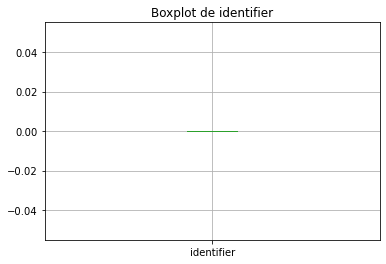

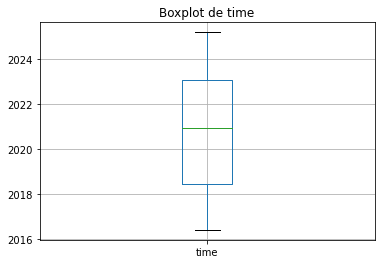

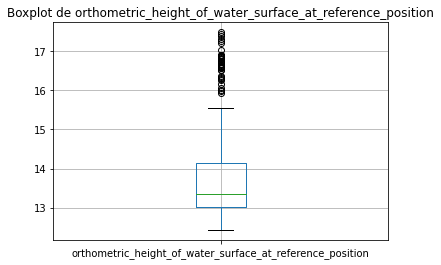

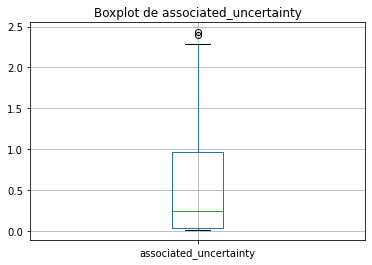

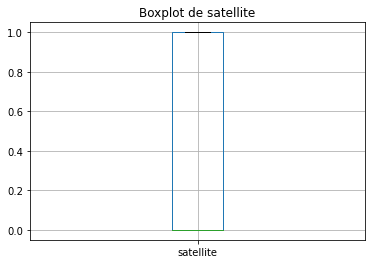

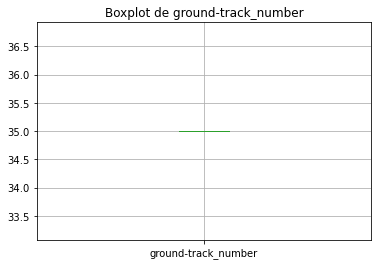

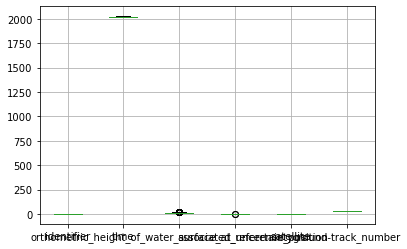

In [22]:
# Filtrer les colonnes numériques uniquement (exclut les datetime)
numeric_cols = df_traitement.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    df_traitement.boxplot(column=col)
    plt.title(f"Boxplot de {col}")
    plt.grid(True)
    plt.show()
df_traitement.boxplot()
plt.show()


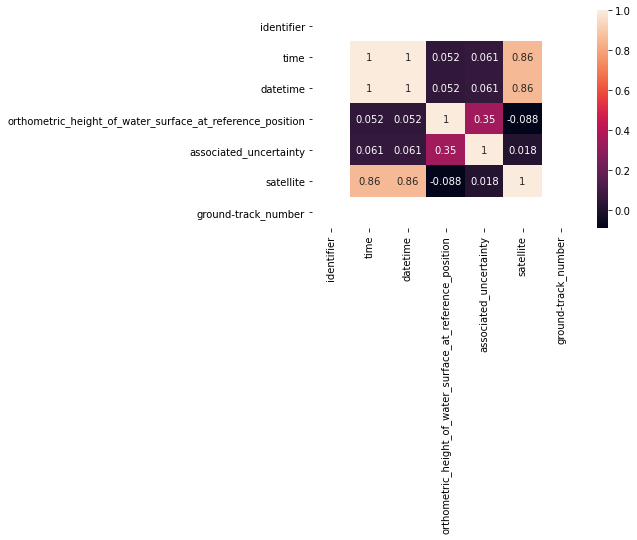

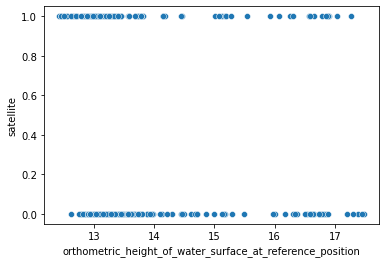

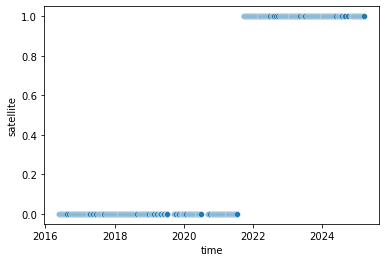

In [23]:
#correlation matrix
corr=  df_traitement.corr()
sns.heatmap(corr, annot=True,)
plt.show()

sns.scatterplot(x='orthometric_height_of_water_surface_at_reference_position',y='satellite',data= df_traitement)
plt.show()

sns.scatterplot(x='time',y='satellite',data= df_traitement)
plt.show()

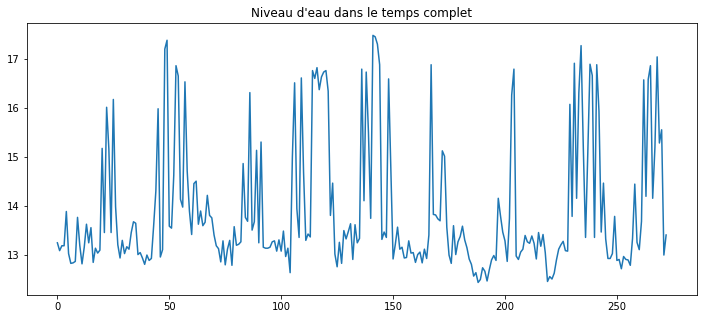

In [24]:

plt.figure(figsize=(10, 5)) 
df_traitement['orthometric_height_of_water_surface_at_reference_position'].plot(figsize=(12, 5), title="Niveau d'eau dans le temps complet")
plt.show()


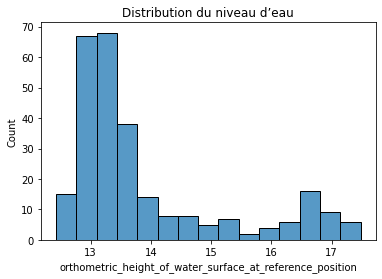

In [25]:
sns.histplot(df_traitement['orthometric_height_of_water_surface_at_reference_position'])
plt.title("Distribution du niveau d’eau")
plt.show()


In [26]:
#les plus grandes hauteurs 
top10 = df_traitement.sort_values(by='orthometric_height_of_water_surface_at_reference_position', ascending=False).head(10)
print(top10)

#les plus petites hauteurs 
minus10 = df_traitement.sort_values(by='orthometric_height_of_water_surface_at_reference_position', ascending=True).head(10)
print(minus10)

     identifier         time            datetime  \
141           0  2021.072441 2021-01-27 10:35:00   
142           0  2021.099606 2021-02-06 08:33:00   
49            0  2017.923908 2017-12-04 05:26:00   
143           0  2021.126773 2021-02-16 06:32:00   
234           0  2023.979218 2023-12-24 09:57:00   
48            0  2017.896741 2017-11-24 07:27:00   
268           0  2025.090291 2025-02-02 22:57:00   
231           0  2023.897721 2023-11-24 16:02:00   
238           0  2024.087644 2024-02-02 01:52:00   
167           0  2021.941758 2021-12-10 17:48:00   

     orthometric_height_of_water_surface_at_reference_position  \
141                                              17.48           
142                                              17.45           
49                                               17.38           
143                                              17.30           
234                                              17.27           
48                             

In [27]:

df_visualisation = df_traitement.set_index('datetime')

# Forcer datetime au cas où
df_visualisation.index = pd.to_datetime(df_visualisation.index)

# Créer les colonnes année et jour de l'année
df_visualisation['year'] = df_visualisation.index.year
df_visualisation['day_of_year'] = df_visualisation.index.dayofyear
df_visualisation['month'] = df_visualisation.index.month


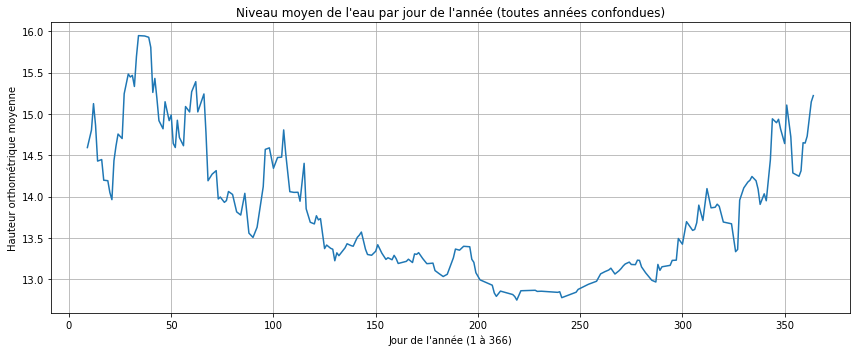

In [28]:
# On calcule la moyenne pour chaque jour de l'année sur toutes les années
daily_avg = df_visualisation.groupby('day_of_year')['orthometric_height_of_water_surface_at_reference_position'].mean()

# Visualisation
plt.figure(figsize=(12, 5))
plt.plot(daily_avg.rolling(7).mean())  # moyenne glissante sur 7 jours
plt.title("Niveau moyen de l'eau par jour de l'année (toutes années confondues)")
plt.xlabel("Jour de l'année (1 à 366)")
plt.ylabel("Hauteur orthométrique moyenne")
plt.grid(True)
plt.tight_layout()
plt.show()

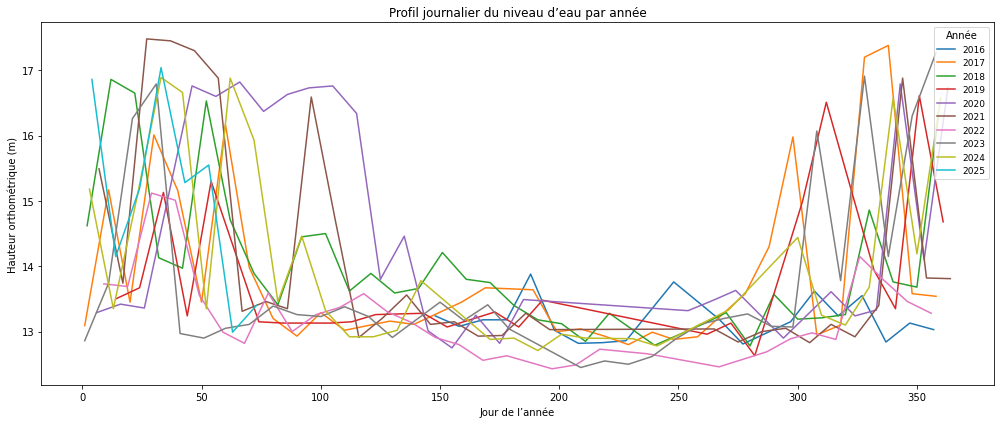

In [29]:
# Créer une grande figure
plt.figure(figsize=(14,6))

# Boucle sur les années
for year in sorted(df_visualisation['year'].unique()):
    yearly_data = df_visualisation[df_visualisation['year'] == year]
    plt.plot(
        yearly_data['day_of_year'].values,
        yearly_data['orthometric_height_of_water_surface_at_reference_position'].values,
        label=str(year)
    )

plt.title("Profil journalier du niveau d’eau par année")
plt.xlabel("Jour de l’année")
plt.ylabel("Hauteur orthométrique (m)")
plt.legend(title="Année", loc="upper right", fontsize=9)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Boxplot du niveau d’eau par mois')

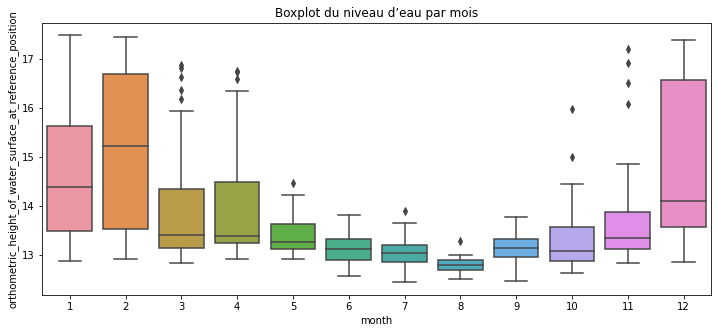

In [31]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='month', y='orthometric_height_of_water_surface_at_reference_position', data=df_visualisation)
plt.title("Boxplot du niveau d’eau par mois")

# scénarios d’entrée

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Assure-toi que les données sont bien ordonnées par date
df = df.sort_index()

# Trace de la PACF pour la série de niveau d’eau
plt.figure(figsize=(10, 5))
plot_pacf(df['orthometric_height_of_water_surface_at_reference_position'], lags=40, method='ywm')
plt.title("Partial Autocorrelation Function (PACF) du niveau d’eau")
plt.xlabel("Lag (jours)")
plt.ylabel("Corrélation partielle")
plt.grid(True)
plt.tight_layout()
plt.show()


AttributeError: module 'numpy' has no attribute 'MachAr'

In [ ]:
X = df[['lag_1', 'lag_2', 'lag_3', 'lag_5']]



KeyError: "None of [Index(['lag_1', 'lag_2', 'lag_3', 'lag_5'], dtype='object')] are in the [columns]"

RMSE : 1.324
R² : 0.240


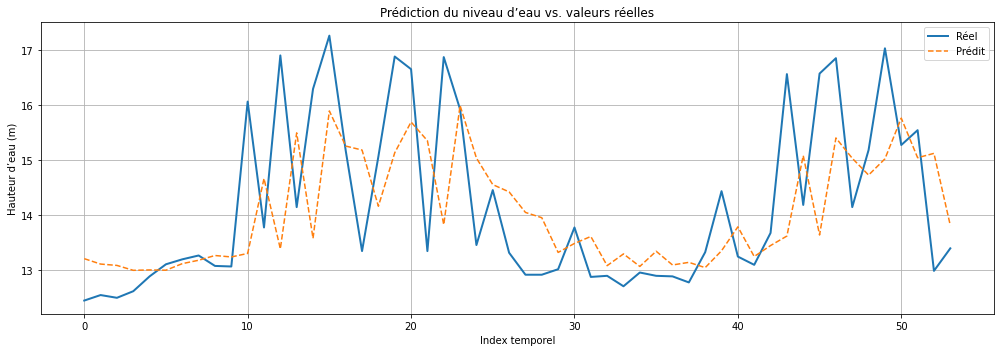

In [ ]:
df['lag_1'] = df['orthometric_height_of_water_surface_at_reference_position'].shift(1)
df['lag_2'] = df['orthometric_height_of_water_surface_at_reference_position'].shift(2)
df['lag_3'] = df['orthometric_height_of_water_surface_at_reference_position'].shift(3)
df['lag_5'] = df['orthometric_height_of_water_surface_at_reference_position'].shift(5)
df['target'] = df['orthometric_height_of_water_surface_at_reference_position']

df_model = df[['target', 'lag_1', 'lag_2', 'lag_3', 'lag_5']].dropna()

X = df_model[['lag_1', 'lag_2', 'lag_3', 'lag_5']]
y = df_model['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE : {rmse:.3f}")
print(f"R² : {r2:.3f}")


import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test.values, label='Réel', linewidth=2)
plt.plot(y_pred, label='Prédit', linestyle='--')
plt.legend()
plt.title("Prédiction du niveau d’eau vs. valeurs réelles")
plt.xlabel("Index temporel")
plt.ylabel("Hauteur d’eau (m)")
plt.grid(True)
plt.tight_layout()
plt.show()


